# 0.1.4 - Preprocessing: List Price

**Overview**: This notebook is responsible for encoding the list price into a set of categorical labels.

**Actions**: This notebook performs the following actions:

- Perform EDA on the `List Price` feature.
- Obtain a histogram of the list price distribution across all records.
- Use binned ranges to determine response categories.
- Add `Price` feature with the labelled list price category.

**Dependencies**: This notebook depends on the following artifact(s):

- `data/interim/ecommerce_data-cleaned-0.1.3.csv`

**Targets**: This notebook outputs one (1) artifact:

- `data/interim/ecommerce_data-cleaned-0.1.4.csv`

## Setup

The following cells import required libraries for python analysis, import the module path to access the project's `src/` module scripts, and enable autoreloading for the hot-reloading of source files outside of the notebook. These are all optional and should be included if needed for development.

In [1]:
# Enable hot-reloading of external scripts.
%load_ext autoreload
%autoreload 2

# Set project directory to project root.
from pathlib import Path
PROJECT_DIR = Path.cwd().resolve().parents[0]
%cd {PROJECT_DIR}

# Import utilities.
from src.data import *
from src.features import *

A:\Library\My Repositories\rit\2211_FALL\ISTE780\Project


In [2]:
# Get the dependency.
input_filepath = get_interim_filepath("0.1.3", tag="cleaned")
df_input = pd.read_csv(input_filepath, index_col = 0)
df_input.info()
df_input.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29604 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         29041 non-null  object 
 1   name          29604 non-null  object 
 2   description   29552 non-null  object 
 3   category_1    29604 non-null  object 
 4   category_2    29604 non-null  object 
 5   category_3    29604 non-null  object 
 6   keywords      29604 non-null  object 
 7   price_raw     29604 non-null  float64
 8   discount_raw  29604 non-null  float64
dtypes: float64(2), object(7)
memory usage: 2.3+ MB


,brand,name,description,category_1,category_2,category_3,keywords,price_raw,discount_raw
0,la cost,la costena chipotl pepper 7 oz pack 12,we aim show accur product inform manufactur su...,food,meal solut grain pasta,can good,can veget,31.93,31.93
1,equat,equat triamcinolon acetonid nasal allergi spra...,we aim show accur product inform manufactur su...,health,equat,equat allergi,equat sinu congest nasal care,10.48,10.48
2,adurosmart eria,adurosmart eria soft white smart a19 light bul...,we aim show accur product inform manufactur su...,electron,smart home,smart energi light,smart light smart light bulb,10.99,10.99
3,lowrid,24 classic adjust balloon fender set chrome bi...,we aim show accur product inform manufactur su...,sport outdoor,bike,bike accessori,bike fender,38.59,38.59
4,anself,eleph shape silicon drinkwar portabl silicon c...,we aim show accur product inform manufactur su...,babi,feed,sippi cup altern plastic,unknown,5.81,5.81


In [3]:
list_price = df_input['price_raw']
describe_features.describe_price(list_price)

There are 0 records with missing list prices.
Quantiles: 0% [0.1], 25% [11.12], 50% [21.47], 75% [46.02], 100% [13280.81]
Inter-quartile Range: 34.900000000000006
Distance between Q4 and Q3: 13234.789999999999


count    29604.000000
mean        72.760576
std        319.713464
min          0.100000
25%         11.120000
50%         21.470000
75%         46.020000
max      13280.810000
Name: price_raw, dtype: float64

In [4]:
# Count below.
describe_features.count_below(list_price, 1)
describe_features.count_below(list_price, 10)
describe_features.count_below(list_price, list_price.quantile(0.25))
describe_features.count_below(list_price, list_price.quantile(0.50))

There are 47 products with prices less than or equal to 1
There are 6578 products with prices less than or equal to 10
There are 7406 products with prices less than or equal to 11.12
There are 14807 products with prices less than or equal to 21.47


In [5]:
# Count above.
describe_features.count_above(list_price, list_price.quantile(0.50))
describe_features.count_above(list_price, 100)
describe_features.count_above(list_price, 500)
describe_features.count_above(list_price, 2000)
describe_features.count_above(list_price, 10000)

There are 14797 products with prices greater than 21.47
There are 3279 products with prices greater than 100
There are 501 products with prices greater than 500
There are 157 products with prices greater than 2000
There are 2 products with prices greater than 10000


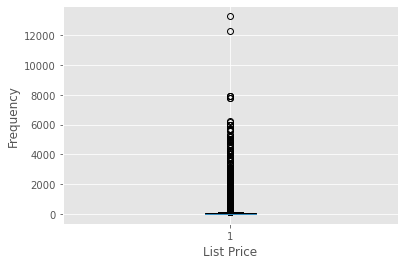

In [6]:
# Import plotting library.
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.style.use('ggplot')

# Boxplot of outliers
fig, ax = plt.subplots(1, 1)
ax.boxplot(list_price)
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

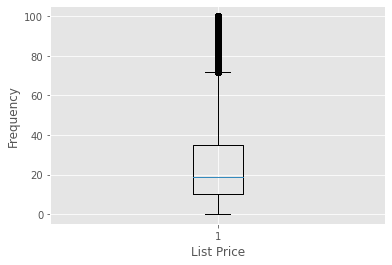

In [7]:
# Boxplot of outliers
mask = list_price > 100
fig, ax = plt.subplots(1, 1)
ax.boxplot(list_price[~mask])
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

We can see that $\approx \$70$ is the threshold for where values start to become outliers.

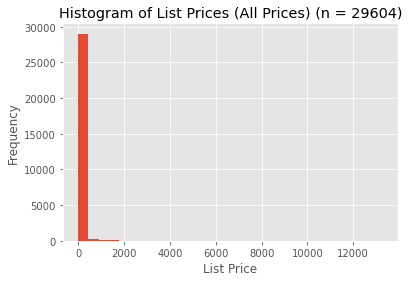

In [8]:
# Histogram of List Prices
fig, ax = plt.subplots(1, 1)
ax.hist(list_price, bins=30)
ax.set_title("Histogram of List Prices (All Prices) (n = {})".format(list_price.shape[0]))
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

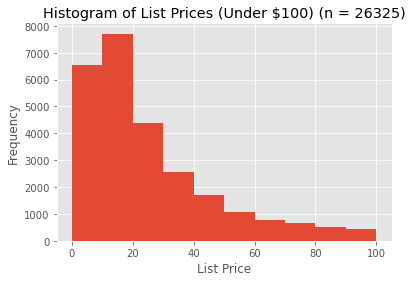

In [9]:
# Filtering out the outliers.
mask = list_price > 100
fig, ax = plt.subplots(1, 1)
ax.hist(list_price[~mask], bins=10, range=(0, 100))
ax.set_title("Histogram of List Prices (Under $100) (n = {})".format(list_price[~mask].shape[0]))
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

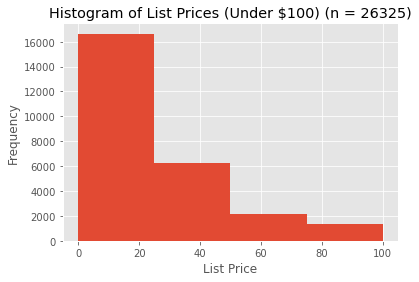

In [10]:
# Filtering out the outliers.
fig, ax = plt.subplots(1, 1)
ax.hist(list_price, bins=4, range=(0, 100))
ax.set_title("Histogram of List Prices (Under $100) (n = {})".format(list_price[~mask].shape[0]))
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

A vast majority ($n = 26325$) of the dataset is above $\$100$.

In [11]:
# Encode the prices into a price label.
price_range = build_features.encode_price(df_input['price_raw'])
print("There are {} products with missing labels.".format(price_range.isna().sum()))

There are 0 products with missing labels.


In [12]:
df_labelled = pd.concat([df_input, price_range], axis=1)
df_labelled.describe(include='all')

,brand,name,description,category_1,category_2,category_3,keywords,price_raw,discount_raw,price_range
count,29041,29604,29552,29604,29604,29604,29604,29604.000000,29604.000000,29604
unique,9939,29291,28711,34,311,1506,2075,NaN,NaN,4
top,uniqu bargain,footbal america youth integr footbal pant 18u,we aim show accur product inform manufactur su...,sport outdoor,sport,bike compon,unknown,NaN,NaN,"(0, 25]"
freq,317,8,95,10963,3746,1284,11690,NaN,NaN,16670
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.760576,71.885462,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.713464,319.388609,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,0.100000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.120000,10.990000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.470000,20.990000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.020000,45.232500,NaN


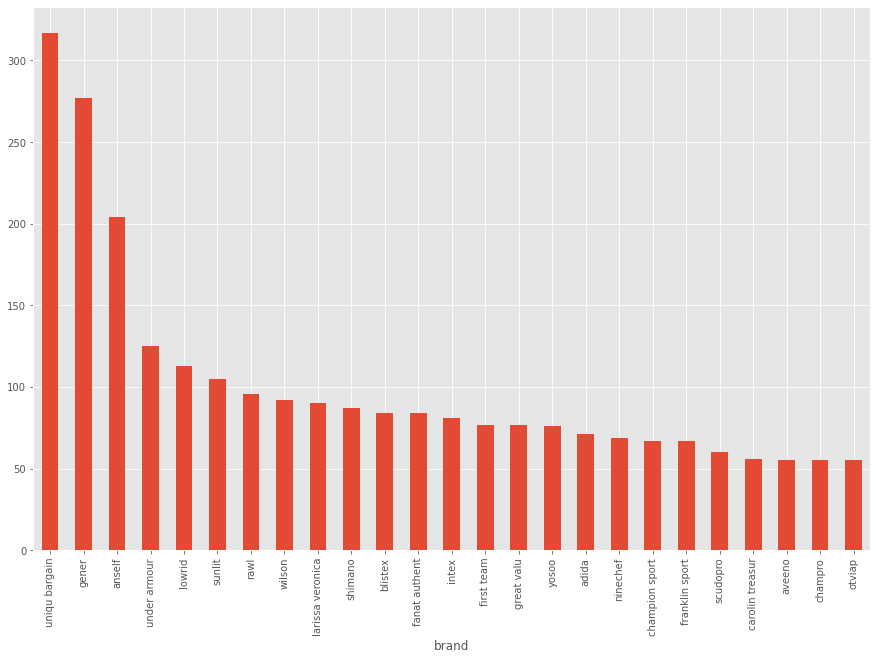

In [13]:
# Reference: https://www.kdnuggets.com/2018/08/multi-class-text-classification-scikit-learn.html
fig = plt.figure(figsize=(15,10))
df_labelled.groupby("brand").price_range.count().nlargest(25).plot.bar(ylim=0)
plt.show()

In [14]:
df_labelled.groupby("brand").price_range.count().nlargest(25)

brand
uniqu bargain       317
gener               277
anself              204
under armour        125
lowrid              113
sunlit              105
rawl                 96
wilson               92
larissa veronica     90
shimano              87
blistex              84
fanat authent        84
intex                81
first team           77
great valu           77
yosoo                76
adida                71
ninechef             69
champion sport       67
franklin sport       67
scudopro             60
carolin treasur      56
aveeno               55
champro              55
otviap               55
Name: price_range, dtype: int64

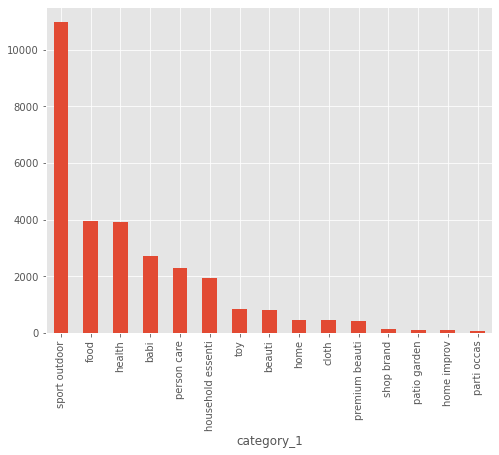

In [15]:
fig = plt.figure(figsize=(8,6))
df_labelled.groupby("category_1").price_range.count().nlargest(15).plot.bar(ylim=0)
plt.show()

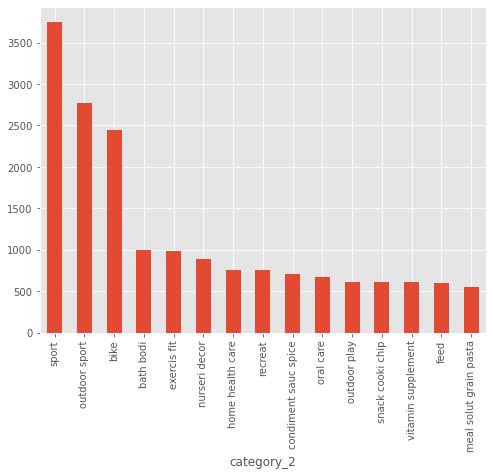

In [16]:
fig = plt.figure(figsize=(8,6))
df_labelled.groupby("category_2").price_range.count().nlargest(15).plot.bar(ylim=0)
plt.show()

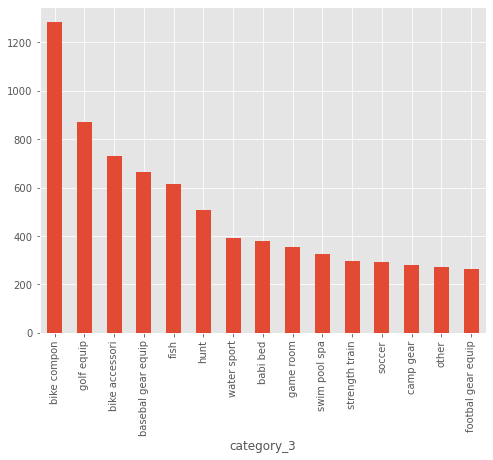

In [17]:
fig = plt.figure(figsize=(8,6))
df_labelled.groupby("category_3").price_range.count().nlargest(15).plot.bar(ylim=0)
plt.show()

## Save Interim Dataset

The dataset has now been labelled appropriately.

In [18]:
# Save the file
df_output = df_labelled
save_interim(df_output, "0.1.4")

Saving (cleaned) dataframe (29604, 10) to A:\Library\My Repositories\rit\2211_FALL\ISTE780\Project\data\interim\ecommerce_data-cleaned-0.1.4.csv.
File saved.
